In [1]:
import gymnasium as gym
from matplotlib import pyplot as plt
import numpy as np

# Self-written code
from rl_env import BitEnv
from rl_agent import Agent, QLAgent
from rl_train import rl_train

# Training Agent on Some Environments

In [3]:
def visualise_train(env: gym.Env, agent: Agent):
    """Visualise training outcomes

    Mostly taken from https://gymnasium.farama.org/introduction/train_agent/
    in 19 Jan 2025

    Args:
        env: post-training gym environment
        agent: post-training agent
    """
    fig, axs = plt.subplots(1, 3, figsize=(20, 8))

    # np.convolve will compute the rolling mean for 100 episodes
    
    axs[0].plot(np.convolve(env.return_queue, np.ones(100)))
    axs[0].set_title("Episode Rewards")
    axs[0].set_xlabel("Episode")
    axs[0].set_ylabel("Reward")
    
    axs[1].plot(np.convolve(env.length_queue, np.ones(100)))
    axs[1].set_title("Episode Lengths")
    axs[1].set_xlabel("Episode")
    axs[1].set_ylabel("Length")
    
    axs[2].plot(np.convolve(agent.training_error, np.ones(100)))
    axs[2].set_title("Training Error")
    axs[2].set_xlabel("Episode")
    axs[2].set_ylabel("Temporal Difference")
    
    plt.tight_layout()
    plt.show()

In [4]:
# Hyperparameters for Q-learning agent
learning_rate = 0.01
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

In [5]:
# Demo 1: BitEnv with p = 0.5
env = BitEnv()
agent = QLAgent(
    env,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon
)

env, agent = rl_train(env, agent, n_eps = 200)

100%|█████████████████████████████████████████| 200/200 [01:36<00:00,  2.07it/s]


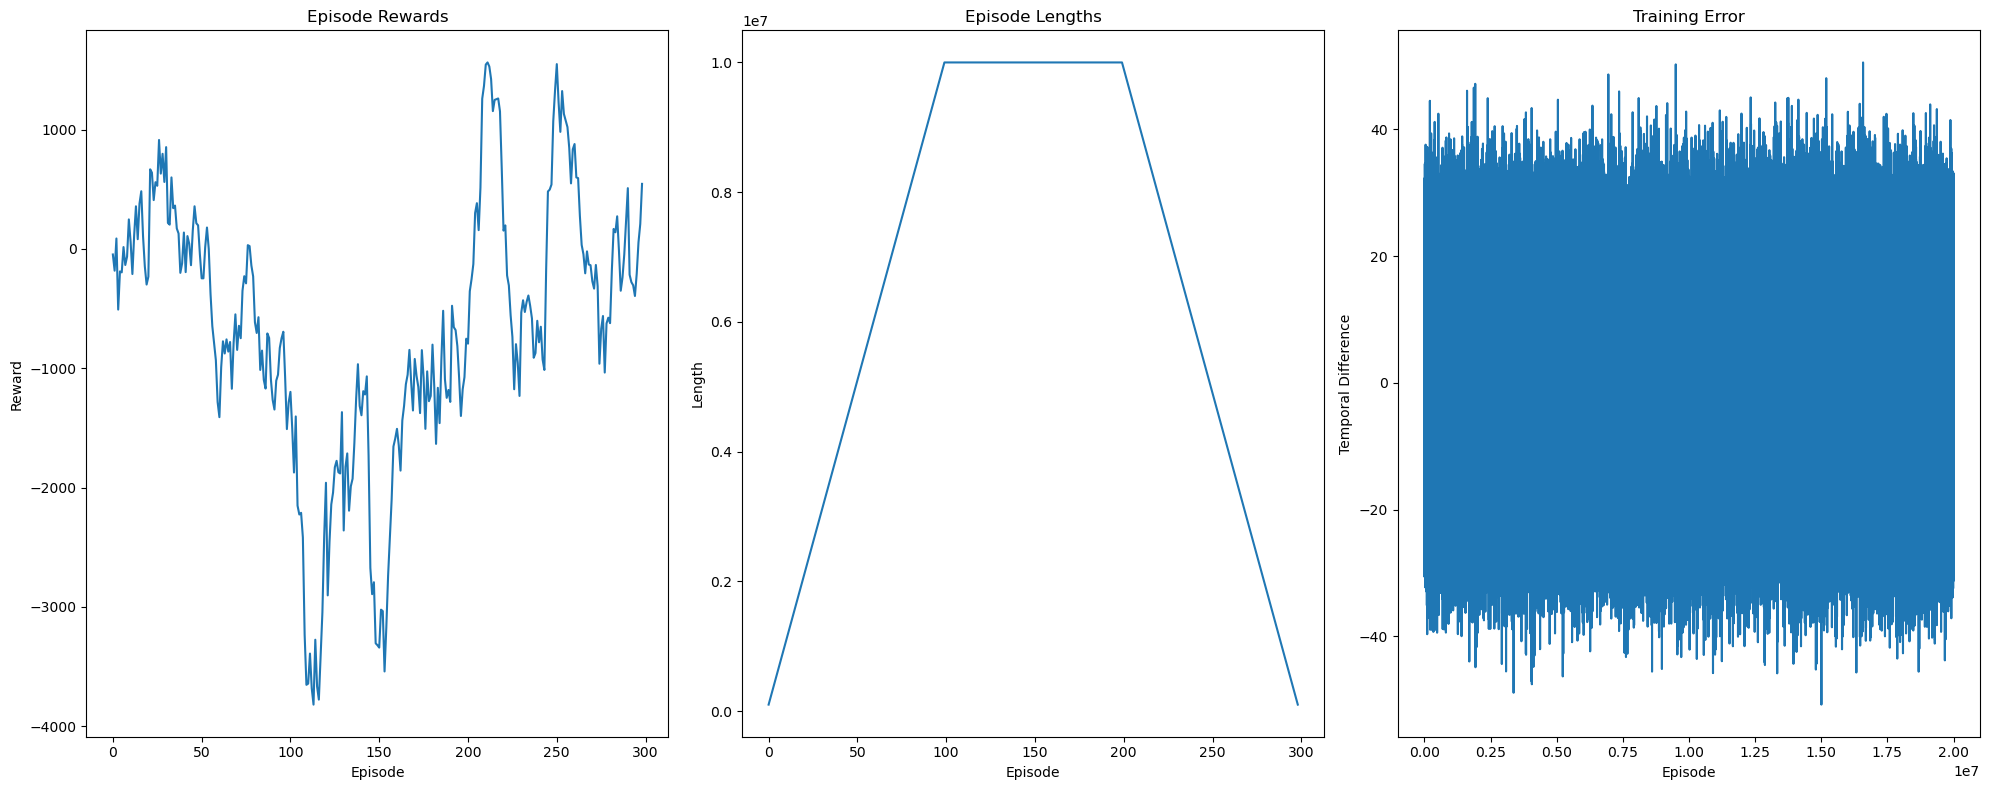

In [6]:
visualise_train(env, agent)

In [ ]:
# Demo 1: BitEnv with p(n) = 1/(n+1)
env = BitEnv(lambda x: 1/(x+1))
agent = QLAgent(
    env,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon
)

env, agent = rl_train(env, agent, n_eps = 200)

 26%|██████████▉                               | 52/200 [00:25<01:11,  2.06it/s]

In [ ]:
visualise_train(env, agent)